In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
sns.set()

In [5]:
raw_data = pd.read_csv('2.01. Admittance.csv')

In [6]:
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [7]:
raw_data.describe()

,SAT
count,168.000000
mean,1695.273810
std,183.019017
min,1334.000000
25%,1547.500000
50%,1691.500000
75%,1844.500000
max,2050.000000


In [8]:
data = raw_data.copy()

In [9]:
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})

In [10]:
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


In [14]:
y = data['Admitted']
x1 = data['SAT']

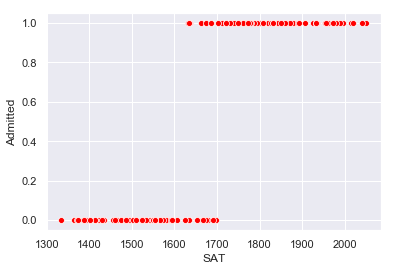

In [15]:
sns.scatterplot(data=data,x=x1,y=y,color='Red')

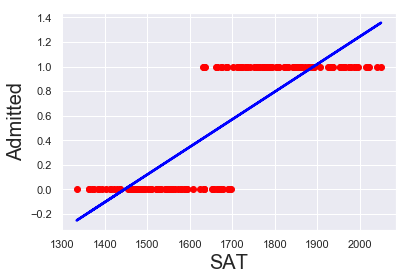

In [19]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
results_lin = reg_lin.fit()

plt.scatter(x1,y,color = 'Red')
y_hat = x1*results_lin.params[1]+results_lin.params[0]

plt.plot(x1,y_hat,lw=2.5,color='Blue')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


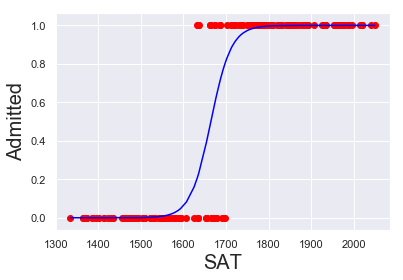

In [20]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color='Red')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.plot(x_sorted,f_sorted,color='Blue')
plt.show()